In [46]:
# Kaggle Comprtition URL
# https://www.kaggle.com/competitions/nlp-getting-started/overview

import pandas as pd
import matplotlib.pyplot as plt

dir_path = './data/'

In [47]:
train_data = pd.read_csv(dir_path + 'train.csv')
test_data = pd.read_csv(dir_path + 'test.csv')

In [48]:
train_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [49]:
test_data.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [50]:
train_target_count = train_data["target"].value_counts()
pd_train_target_count = pd.DataFrame(
        {"target": train_target_count.index, "Count": train_target_count.values}
    )

In [51]:
pd_train_target_count

,target,Count
0,0,4342
1,1,3271


In [52]:
train_keyword_count = train_data["keyword"].value_counts()
pd_train_target_count = pd.DataFrame(
        {"keyword": train_keyword_count.index, "Count": train_keyword_count.values}
    )

In [53]:
pd_train_target_count

,keyword,Count
0,fatalities,45
1,deluge,42
2,armageddon,42
3,sinking,41
4,damage,41
...,...,...
216,forest%20fire,19
217,epicentre,12
218,threat,11
219,inundation,10


In [54]:
train_keyword_target0_count = train_data[train_data["target"] == 0]["keyword"].value_counts()
train_keyword_target1_count = train_data[train_data["target"] == 1]["keyword"].value_counts()
pd_train_keyword_target0_count = pd.DataFrame(
        {"keyword": train_keyword_target0_count.index, "target_0": train_keyword_target0_count.values}
    )
pd_train_keyword_target1_count = pd.DataFrame(
        {"keyword": train_keyword_target1_count.index, "target_1": train_keyword_target1_count.values}
    )

In [55]:
pd_train_keyword_target0_count

,keyword,target_0
0,body%20bags,40
1,harm,37
2,armageddon,37
3,wrecked,36
4,ruin,36
...,...,...
213,typhoon,1
214,suicide%20bombing,1
215,suicide%20bomber,1
216,outbreak,1


In [56]:
pd_train_keyword_target1_count

,keyword,target_1
0,derailment,39
1,wreckage,39
2,outbreak,39
3,debris,37
4,oil%20spill,37
...,...,...
215,blazing,1
216,epicentre,1
217,body%20bag,1
218,electrocute,1


In [57]:
pd_train_keyword_target_count = pd.merge(
    pd_train_keyword_target0_count,
    pd_train_keyword_target1_count,
    on="keyword",
    how="outer"
)

pd_train_keyword_target_count.fillna(0, inplace=True)

In [58]:
pd_train_keyword_target_count

,keyword,target_0,target_1
0,body%20bags,40.0,1.0
1,harm,37.0,4.0
2,armageddon,37.0,5.0
3,wrecked,36.0,3.0
4,ruin,36.0,1.0
...,...,...,...
216,outbreak,1.0,39.0
217,oil%20spill,1.0,37.0
218,derailment,0.0,39.0
219,wreckage,0.0,39.0


In [59]:
pd_train_keyword_target_count["target_1_ratio"] = pd_train_keyword_target_count["target_1"] / (pd_train_keyword_target_count["target_0"] + pd_train_keyword_target_count["target_1"])

In [60]:
pd_train_keyword_target_count

,keyword,target_0,target_1,target_1_ratio
0,body%20bags,40.0,1.0,0.024390
1,harm,37.0,4.0,0.097561
2,armageddon,37.0,5.0,0.119048
3,wrecked,36.0,3.0,0.076923
4,ruin,36.0,1.0,0.027027
...,...,...,...,...
216,outbreak,1.0,39.0,0.975000
217,oil%20spill,1.0,37.0,0.973684
218,derailment,0.0,39.0,1.000000
219,wreckage,0.0,39.0,1.000000


In [61]:
pd_train_keyword_target_count_sorted_ratio = pd_train_keyword_target_count.sort_values(by="target_1_ratio", ascending=False)
pd_train_keyword_target_count_sorted_ratio.reset_index(drop=True, inplace=True)

In [62]:
pd_train_keyword_target_count_sorted_ratio

,keyword,target_0,target_1,target_1_ratio
0,debris,0.0,37.0,1.000000
1,wreckage,0.0,39.0,1.000000
2,derailment,0.0,39.0,1.000000
3,outbreak,1.0,39.0,0.975000
4,oil%20spill,1.0,37.0,0.973684
...,...,...,...,...
216,body%20bag,32.0,1.0,0.030303
217,blazing,33.0,1.0,0.029412
218,ruin,36.0,1.0,0.027027
219,body%20bags,40.0,1.0,0.024390


In [65]:
train_all_keywords = pd_train_keyword_target_count_sorted_ratio["keyword"].str.replace("%20", " ").str.split().explode()
train_all_keywords_count = train_all_keywords.value_counts()

In [66]:
train_all_keywords_count

keyword
emergency     5
fire          4
disaster      3
buildings     3
body          3
             ..
ambulance     1
hurricane     1
lightning     1
hail          1
aftershock    1
Name: count, Length: 229, dtype: int64

In [78]:
train_keyword_set = set(train_data["keyword"])
test_keyword_set = set(test_data["keyword"])
keyword_intersection = train_keyword_set & test_keyword_set
keyword_union = train_keyword_set | test_keyword_set
keyword_overlap_rate = len(keyword_intersection) / len(keyword_union)

In [79]:
len(keyword_intersection)

222

In [80]:
keyword_overlap_rate

1.0

In [81]:
nan_info = pd.DataFrame({
    "train_NaN_Count": train_data.isna().sum(),
    "test_NaN_Count": test_data.isna().sum()
})

In [82]:
nan_info

,train_NaN_Count,test_NaN_Count
id,0,0.0
keyword,61,26.0
location,2533,1105.0
target,0,NaN
text,0,0.0


([], [])

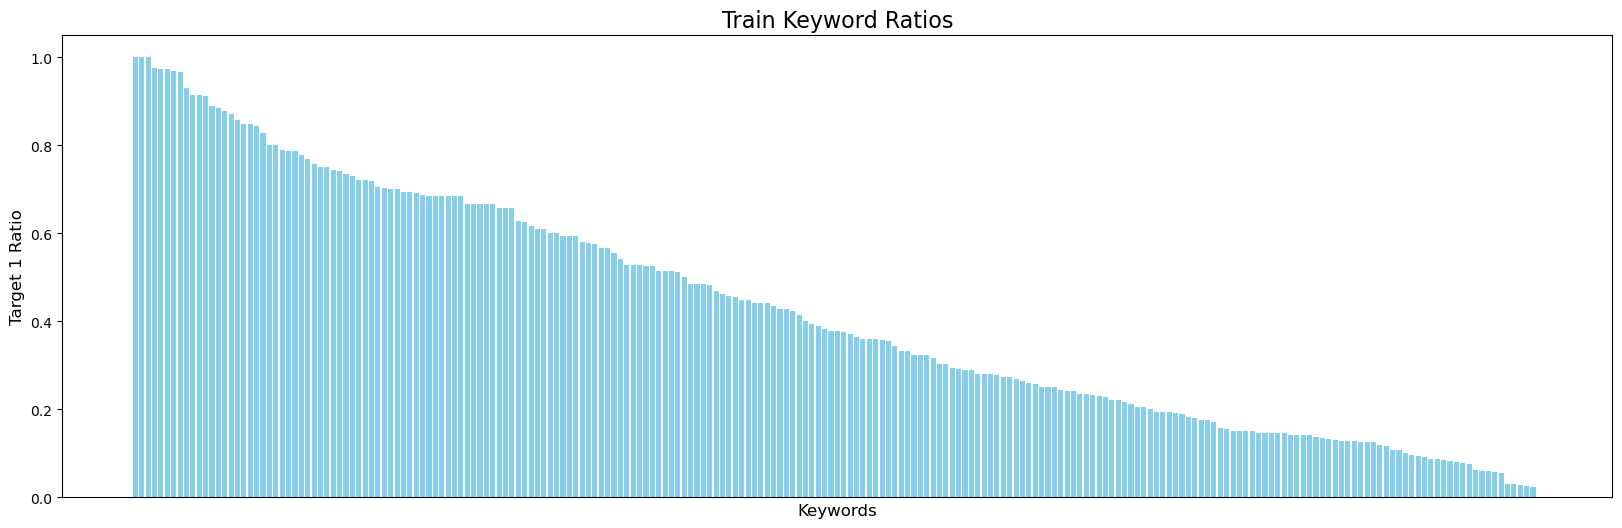

In [84]:
plt.figure(figsize=(20, 6))
plt.bar(range(len(pd_train_keyword_target_count_sorted_ratio)), pd_train_keyword_target_count_sorted_ratio['target_1_ratio'], color='skyblue')

plt.xticks(range(len(pd_train_keyword_target_count_sorted_ratio)), pd_train_keyword_target_count_sorted_ratio['keyword'], rotation=90, fontsize=10)

plt.title('Train Keyword Ratios', fontsize=16)
plt.xlabel('Keywords', fontsize=12)
plt.ylabel('Target 1 Ratio', fontsize=12)

plt.xticks([])

In [87]:
pd_train_keyword_target_count_sorted_target1 = pd_train_keyword_target_count.sort_values(by="target_1", ascending=False)
pd_train_keyword_target_count_sorted_target1.reset_index(drop=True, inplace=True)

In [88]:
pd_train_keyword_target_count_sorted_target1

,keyword,target_0,target_1,target_1_ratio,split_keywords
0,wreckage,0.0,39.0,1.000000,[wreckage]
1,derailment,0.0,39.0,1.000000,[derailment]
2,outbreak,1.0,39.0,0.975000,[outbreak]
3,debris,0.0,37.0,1.000000,[debris]
4,oil%20spill,1.0,37.0,0.973684,"[oil, spill]"
...,...,...,...,...,...
216,blazing,33.0,1.0,0.029412,[blazing]
217,body%20bag,32.0,1.0,0.030303,"[body, bag]"
218,electrocute,31.0,1.0,0.031250,[electrocute]
219,body%20bags,40.0,1.0,0.024390,"[body, bags]"


([], [])

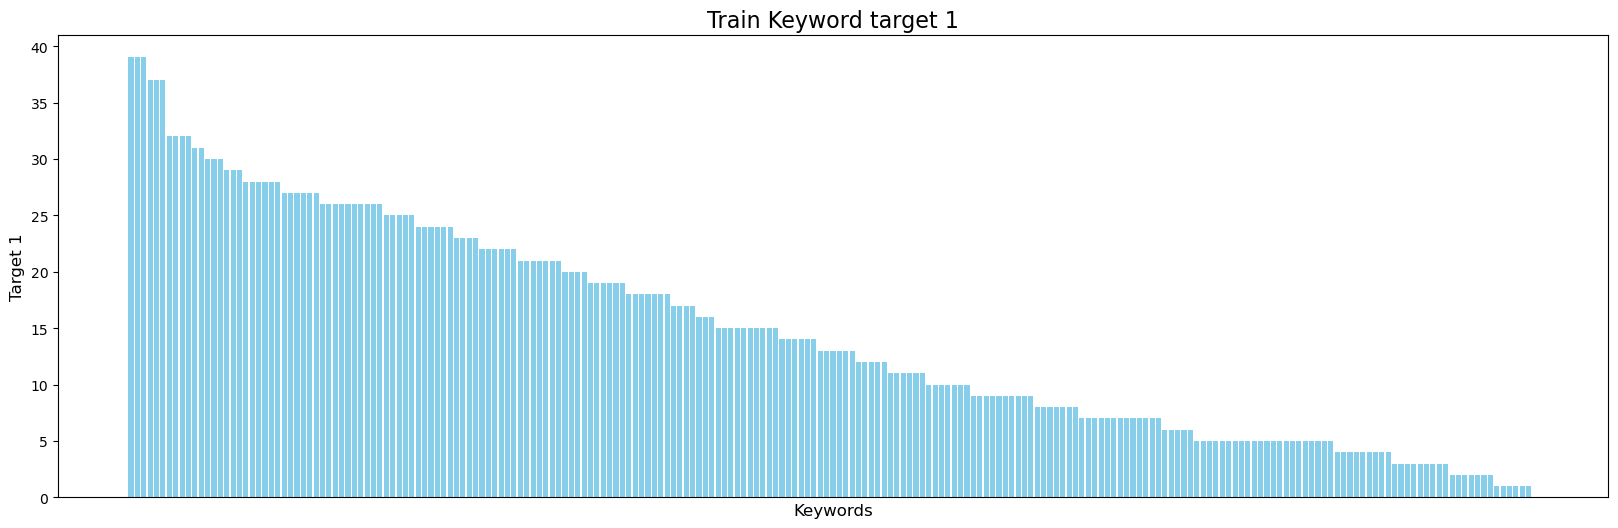

In [89]:
plt.figure(figsize=(20, 6))
plt.bar(range(len(pd_train_keyword_target_count_sorted_target1)), pd_train_keyword_target_count_sorted_target1['target_1'], color='skyblue')

plt.xticks(range(len(pd_train_keyword_target_count_sorted_target1)), pd_train_keyword_target_count_sorted_target1['split_keywords'], rotation=90, fontsize=10)

plt.title('Train Keyword target 1', fontsize=16)
plt.xlabel('Keywords', fontsize=12)
plt.ylabel('Target 1', fontsize=12)

plt.xticks([])